In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
DIR = './data/20m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww = []
tt = []
SweepMean = []
EjectionMean = []
OutwardMean = []
InwardMean = []
OutwardFra = []
EjectionFra = []
InwardFra = []
SweepFra = []
HeatMean = []

for fi in range(5):
    xls = pd.ExcelFile(f'./data/20m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww.append(df[di]["w' (m/s)"].dropna())
        tt.append(df[di]["t' (C)"].dropna())

        SweepMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][11])
        EjectionMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][13])
        OutwardMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][15])
        InwardMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][17])

        OutwardFra.append(df[di]["Momentum Outward Interaction (S'>0, w'>0)"][7])
        EjectionFra.append(df[di]["Momentum Ejection (S'<0, w'>0)"][7])
        InwardFra.append(df[di]["Momentum Inward Interaction (S'<0, w'<0)"][7])
        SweepFra.append(df[di]["Momentum Sweep (S'>0, w'<0)"][7])
        
        HeatMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][19])

In [3]:
DIR = './data/3m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww = []
tt = []
SweepMean = []
EjectionMean = []
OutwardMean = []
InwardMean = []
OutwardFra = []
EjectionFra = []
InwardFra = []
SweepFra = []

for fi in range(5):
    xls = pd.ExcelFile(f'./data/3m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww.append(df[di]["w' (m/s)"].dropna())
        tt.append(df[di]["t' (C)"].dropna())

        SweepMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][11])
        EjectionMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][13])
        OutwardMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][15])
        InwardMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][17])

        OutwardFra.append(df[di]["Momentum Outward Interaction (S'>0, w'>0)"][7])
        EjectionFra.append(df[di]["Momentum Ejection (S'<0, w'>0)"][7])
        InwardFra.append(df[di]["Momentum Inward Interaction (S'<0, w'<0)"][7])
        SweepFra.append(df[di]["Momentum Sweep (S'>0, w'<0)"][7])

In [4]:
DIR = './data/10m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'West']

ww = []
tt = []
SweepMean = []
EjectionMean = []
OutwardMean = []
InwardMean = []
OutwardFra = []
EjectionFra = []
InwardFra = []
SweepFra = []

for fi in range(4):
    xls = pd.ExcelFile(f'./data/10m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww.append(df[di]["w' (m/s)"].dropna())
        tt.append(df[di]["t' (C)"].dropna())

        SweepMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][11])
        EjectionMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][13])
        OutwardMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][15])
        InwardMean.append(df[di]["Momentum Ejection (S'<0, w'>0)"][17])

        OutwardFra.append(df[di]["Momentum Outward Interaction (S'>0, w'>0)"][7])
        EjectionFra.append(df[di]["Momentum Ejection (S'<0, w'>0)"][7])
        InwardFra.append(df[di]["Momentum Inward Interaction (S'<0, w'<0)"][7])
        SweepFra.append(df[di]["Momentum Sweep (S'>0, w'<0)"][7])

In [23]:
def plot(di, xl, xr, yl, yr, c):
    plt.scatter(tt[di], ww[di], c=c, s=1)
    plt.xlim(xl, xr)
    plt.ylim(yl, yr)
    plt.hlines(0, xl, xr, 'c', lw=1)
    plt.vlines(0, yl, yr, 'c', lw=1)
    plt.ylabel("$w^{'}(m s^{-1})$")
    plt.xlabel("$t^{'}(C)$")
    plt.text(.21, .96, 'Outward Interaction', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .89, "$\overline{w^{'}t^{'}}$ = "+f"{OutwardMean[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .83, f"Fraction = {OutwardFra[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.1, .2, 'Sweep', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .12, "$\overline{w^{'}t^{'}}$ = "+f"{SweepMean[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .05, f"Fraction = {SweepFra[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.8, .2, 'Inward Interaction', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .12, "$\overline{w^{'}t^{'}}$ = "+f"{InwardMean[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.83, .05, f"Fraction = {InwardFra[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .96, 'Ejection', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .89, "$\overline{w^{'}t^{'}}$ = "+f"{EjectionMean[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.83, .83, f"Fraction = {EjectionFra[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)

In [38]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
tower = ['East', 'Flux', 'North', 'South', 'West']
for di in range(15):
    ax = plt.subplot(5,3,di+1)
    if not di % 3:
        plot(di, -12, 12, -6, 6, 'lime')
        if di == 0:
            plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 1:
        plot(di, -10, 50, -8, 8, 'r')
        if di == 1:
            plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 2:
        plot(di, -4, 12, -6, 6, 'k')
        plt.text(1.08, .9, tower[int(di/3)], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        if di == 2:
            plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Turbulent heat flux quadrant scatter plots at 20m', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/HeatFlux20m.png')
plt.close()

In [41]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
for di in range(15):
    ax = plt.subplot(5,3,di+1)
    if not di % 3:
        plot(di, -6, 6, -6, 6, 'lime')
        if di == 0:
            plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 1:
        plot(di, -20, 100, -4, 4, 'r')
        if di == 1:
            plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 2:
        plot(di, -5, 20, -4, 4, 'k')
        plt.text(1.08, .9, tower[int(di/3)], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        if di == 2:
            plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Turbulent heat flux quadrant scatter plots at 3m', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/HeatFlux3m.png')
plt.close()

In [45]:
fig, axs = plt.subplots(4, 3, figsize=(15, 18))
for di in range(12):
    ax = plt.subplot(5,3,di+1)
    if not di % 3:
        plot(di, -4, 12, -4, 4, 'lime')
    if di % 3 == 1:
        plot(di, -20, 100, -8, 8, 'r')
    if di % 3 == 2:
        plot(di, -5, 20, -4, 4, 'k')
        plt.text(1.08, .9, tower[int(di/3)], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        
    if di == 0:
        plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    elif di == 1:
        plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    elif di == 2:
        plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Turbulent heat flux quadrant scatter plots at 10m', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/HeatFlux10m.png')
plt.close()

In [12]:
SweepMean = np.zeros((3, 5, 3)) * np.nan
EjectionMean = np.zeros((3, 5, 3)) * np.nan
OutwardMean = np.zeros((3, 5, 3)) * np.nan
InwardMean = np.zeros((3, 5, 3)) * np.nan
OutwardFra = np.zeros((3, 5, 3)) * np.nan
EjectionFra = np.zeros((3, 5, 3)) * np.nan
InwardFra = np.zeros((3, 5, 3)) * np.nan
SweepFra = np.zeros((3, 5, 3)) * np.nan
HeatMean = np.zeros((3, 5, 3)) * np.nan

h = ['3m', '10m', '20m']
for hi in range(3):
    DIR = f'./data/{h[hi]}'
    fna = [name for name in os.listdir(DIR)]
    fna.sort()
    fno = len(fna)
    if hi-1:
        fil = 5
    else:
        fil = 4
    for fi in range(fil):
        xls = pd.ExcelFile(f'./data/{h[hi]}/{fna[fi]}')
        df_pre = pd.read_excel(xls, 'Pre-FFP')
        df_dur = pd.read_excel(xls, 'FFP')
        df_post = pd.read_excel(xls, 'Post-FFP')

        df = [df_pre, df_dur, df_post]
        if hi==1 and fi == 3:
            fii = fi + 1
        else:
            fii = fi
        for di in range(3):
            SweepMean[hi, fii, di] = df[di]["Momentum Ejection (S'<0, w'>0)"][11]
            EjectionMean[hi, fii, di] = df[di]["Momentum Ejection (S'<0, w'>0)"][13]
            OutwardMean[hi, fii, di] = df[di]["Momentum Ejection (S'<0, w'>0)"][15]
            InwardMean[hi, fii, di] = df[di]["Momentum Ejection (S'<0, w'>0)"][17]

            OutwardFra[hi, fii, di] = df[di]["Momentum Outward Interaction (S'>0, w'>0)"][7]
            EjectionFra[hi, fii, di] = df[di]["Momentum Ejection (S'<0, w'>0)"][7]
            InwardFra[hi, fii, di] = df[di]["Momentum Inward Interaction (S'<0, w'<0)"][7]
            SweepFra[hi, fii, di] = df[di]["Momentum Sweep (S'>0, w'<0)"][7]

            HeatMean[hi, fii, di] = df[di]["Momentum Ejection (S'<0, w'>0)"][19]

np.save('./var/SweepMean', SweepMean)
np.save('./var/EjectionMean', EjectionMean)
np.save('./var/OutwardMean', OutwardMean)
np.save('./var/InwardMean', InwardMean)
np.save('./var/OutwardFra', OutwardFra)
np.save('./var/EjectionFra', EjectionFra)
np.save('./var/InwardFra', InwardFra)
np.save('./var/SweepFra', SweepFra)
np.save('./var/HeatMean', HeatMean)

In [3]:
SweepMean = np.load('./var/SweepMean.npy')
EjectionMean = np.load('./var/EjectionMean.npy')
OutwardMean = np.load('./var/OutwardMean.npy')
InwardMean = np.load('./var/InwardMean.npy')
OutwardFra = np.load('./var/OutwardFra.npy')
EjectionFra = np.load('./var/EjectionFra.npy')
InwardFra = np.load('./var/InwardFra.npy')
SweepFra = np.load('./var/SweepFra.npy')
HeatMean = np.load('./var/HeatMean.npy')

In [67]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
Y = [3, 10, 20]
tower = ['East', 'Flux', 'North', 'South', 'West']
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        if ti==3:
            plt.plot([SweepFra[0, ti, pi], SweepFra[2, ti, pi]], [Y[0], Y[2]], 'r-o', ms=3)
            plt.plot([EjectionFra[0, ti, pi], EjectionFra[2, ti, pi]], [Y[0], Y[2]], c='pink', ls='-', marker='o', ms=3)
            plt.plot([OutwardFra[0, ti, pi], OutwardFra[2, ti, pi]], [Y[0], Y[2]], 'b-o', ms=3)
            plt.plot([InwardFra[0, ti, pi], InwardFra[2, ti, pi]], [Y[0], Y[2]], c='cyan', ls='-', marker='o', ms=3)
            plt.xlim(0, .7)
            plt.ylim(0, 23)
            plt.xlabel('Fraction of Events')
            plt.ylabel('Height (m)')
            if pi==2:
                plt.legend(['Sweep', 'Ejection', 'Outward Interaction', 'Inward Interaction'], loc='upper right', frameon=False)
        else:    
            plt.plot(SweepFra[:, ti, pi], Y, 'r-o', ms=3)
            plt.plot(EjectionFra[:, ti, pi], Y, c='pink', ls='-', marker='o', ms=3)
            plt.plot(OutwardFra[:, ti, pi], Y, 'b-o', ms=3)
            plt.plot(InwardFra[:, ti, pi], Y, c='cyan', ls='-', marker='o', ms=3)
            plt.xlim(0, .7)
            plt.ylim(0, 23)
            plt.xlabel('Fraction of Events')
            plt.ylabel('Height (m)')
            if pi==2:
                plt.legend(['Sweep', 'Ejection', 'Outward Interaction', 'Inward Interaction'], loc='upper right', frameon=False)
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Vertical profiles of the fractional number of events', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/VerticalProfile.png')
plt.close()

In [7]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
Y = [3, 10, 20]
tower = ['East', 'Flux', 'North', 'South', 'West']
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        if pi == 0:
            barplot(ti, pi, -.3, .8)
        elif pi == 1:
            barplot(ti, pi, -2, 6)
        elif pi == 2:
            barplot(ti, pi, -.2, .6)
        
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Contributions to the mean turbulent heat fluxes', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/ContributionBar.png')
plt.close()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [43]:
def barplot(ti, pi, xl, xr):
    plt.barh(Y, SweepMean[:, ti, pi]+EjectionMean[:, ti, pi], align='center', height=3, color='pink')
    plt.barh(Y, SweepMean[:, ti, pi], align='center', height=3, color='red')
    plt.barh(Y, InwardMean[:, ti, pi]+OutwardMean[:, ti, pi], align='center', height=3, color='cyan')
    plt.barh(Y, OutwardMean[:, ti, pi], align='center', height=3, color='b')
    if pi == 2:
        if ti == 3:
            plt.legend(['Ejection', 'Sweep', 'Inward Interaction', 'Outward Interaction'], loc='center right', frameon=False)
        else:
            plt.legend(['Ejection', 'Sweep', 'Inward Interaction', 'Outward Interaction'], loc='best', frameon=False)
    plt.vlines(HeatMean[0, ti, pi], 1.5, 4.5, lw=1, colors='yellow')
    plt.text(HeatMean[0, ti, pi]-.018, 4.7, f'{HeatMean[0, ti, pi]:.3f}')
    plt.vlines(HeatMean[1, ti, pi], 8.5, 11.5, lw=1, colors='yellow')
    plt.text(HeatMean[1, ti, pi]-.018, 11.7, f'{HeatMean[1, ti, pi]:.3f}')
    plt.vlines(HeatMean[2, ti, pi], 18.5, 21.5, lw=1, colors='yellow')
    plt.text(HeatMean[2, ti, pi]-.018, 21.7, f'{HeatMean[2, ti, pi]:.3f}')
    plt.vlines(0, 0, 23, lw=1)
    plt.xlim(xl, xr)
    plt.ylim(0, 23)
    plt.xlabel("$\overline{w^{'}t^{'}} (m s^{-1} C)$ ")
    plt.ylabel("Height (m)")

In [2]:
Sweep_Ejection = np.zeros((3, 5, 3)) * np.nan
InOut_SweepEjection = np.zeros((3, 5, 3)) * np.nan

h = ['3m', '10m', '20m']
for hi in range(3):
    DIR = f'./data/{h[hi]}'
    fna = [name for name in os.listdir(DIR)]
    fna.sort()
    fno = len(fna)
    if hi-1:
        fil = 5
    else:
        fil = 4
    for fi in range(fil):
        xls = pd.ExcelFile(f'./data/{h[hi]}/{fna[fi]}')
        df_pre = pd.read_excel(xls, 'Pre-FFP')
        df_dur = pd.read_excel(xls, 'FFP')
        df_post = pd.read_excel(xls, 'Post-FFP')

        df = [df_pre, df_dur, df_post]
        if hi==1 and fi == 3:
            fii = fi + 1
        else:
            fii = fi
        for di in range(3):
            Sweep_Ejection[hi, fii, di] = df[di]["Momentum Ejection (S'<0, w'>0)"][23]
            InOut_SweepEjection[hi, fii, di] = df[di]["Momentum Ejection (S'<0, w'>0)"][25]

np.save('./var/Sweep_Ejection', Sweep_Ejection)
np.save('./var/InOut_SweepEjection', InOut_SweepEjection)

In [33]:
fig, axs = plt.subplots(5, 2, figsize=(12, 20))
tower = ['East', 'Flux', 'North', 'South', 'West']
yr = [1.6, 1.2, 1.6, 1.0, 1.2]
yl = [-.7, -.3, -.6, -.2, -.9]
for ti in range(5):
    ax1 = plt.subplot(5,2,ti*2+1)
    SE(ti, yr[ti])
    ax2 = plt.subplot(5,2,ti*2+2)
    IOSE(ti, yl[ti])
    ax2.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax2.transAxes)
plt.savefig('./plot/Ratio.png')
plt.close()

In [27]:
def SE(ti, yr):
    plt.bar(np.array([0, 1, 2])-.2, Sweep_Ejection[0,ti,:], width=.2, color='orange')
    plt.bar(np.array([0, 1, 2]), Sweep_Ejection[1,ti,:], width=.2, color='blue')
    plt.bar(np.array([0, 1, 2])+.2, Sweep_Ejection[2,ti,:], width=.2, color='green')
    plt.ylim(0, yr)
    plt.legend(h, frameon=False)
    plt.xticks([0, 1, 2], ['Pre-FFP', 'FFP', 'Post-FFP'], fontsize='large', fontweight='bold')
    plt.ylabel('(SW)/(EJ) Ratio', fontsize='large', fontweight='bold')

In [28]:
def IOSE(ti, yl):
    plt.bar(np.array([0, 1, 2])-.2, InOut_SweepEjection[0,ti,:], width=.2, color='orange')
    plt.bar(np.array([0, 1, 2]), InOut_SweepEjection[1,ti,:], width=.2, color='blue')
    plt.bar(np.array([0, 1, 2])+.2, InOut_SweepEjection[2,ti,:], width=.2, color='green')
    plt.ylim(yl, 0)
    plt.legend(h, frameon=False)
    plt.xticks([0, 1, 2], ['Pre-FFP', 'FFP', 'Post-FFP'], fontsize='large', fontweight='bold')
    plt.ylabel('(II+OI)/(SW+EJ) Ratio', fontsize='large', fontweight='bold')

<font size=4 color=blue>horizontal heat flux

In [2]:
DIR = './data/20m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww20 = []
u20 = []
v20 = []
tt20 = []
for fi in range(5):
    xls = pd.ExcelFile(f'./data/20m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww20.append(df[di]["w' (m/s)"].dropna())
        tt20.append(df[di]["t' (C)"].dropna())
        u20.append(df[di].iloc[:, 1].dropna())
        v20.append(df[di].iloc[:, 2].dropna())

In [3]:
DIR = './data/3m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww3 = []
u3 = []
v3 = []
tt3 = []
for fi in range(5):
    xls = pd.ExcelFile(f'./data/3m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww3.append(df[di]["w' (m/s)"].dropna())
        tt3.append(df[di]["t' (C)"].dropna())
        u3.append(df[di].iloc[:, 1].dropna())
        v3.append(df[di].iloc[:, 2].dropna())

In [4]:
DIR = './data/10m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'West']

ww10 = []
u10 = []
v10 = []
tt10 = []
for fi in range(4):
    xls = pd.ExcelFile(f'./data/10m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww10.append(df[di]["w' (m/s)"].dropna())
        tt10.append(df[di]["t' (C)"].dropna())
        u10.append(df[di].iloc[:, 1].dropna())
        v10.append(df[di].iloc[:, 2].dropna())

In [5]:
def uuvv(df):
    if df.iloc[-4] == 'Mean':
        return df.iloc[:-4] - df.iloc[:-4].mean()
    else:
        return df - df.mean()
uu3 = [uuvv(u3[i]) for i in range(15)]
uu10 = [uuvv(u10[i]) for i in range(12)]
uu20 = [uuvv(u20[i]) for i in range(15)]
vv3 = [uuvv(v3[i]) for i in range(15)]
vv10 = [uuvv(v10[i]) for i in range(12)]
vv20 = [uuvv(v20[i]) for i in range(15)]

In [6]:
SweepC20 = [np.logical_and(uu20[i]<0, tt20[i]<0).sum() for i in range(15)]
EjectionC20 = [np.logical_and(uu20[i]>0, tt20[i]>0).sum() for i in range(15)]
OutwardC20 = [np.logical_and(uu20[i]>0, tt20[i]<0).sum() for i in range(15)]
InwardC20 = [np.logical_and(uu20[i]<0, tt20[i]>0).sum() for i in range(15)]

SweepMean20 = [np.where(np.logical_and(uu20[i]<0, tt20[i]<0), uu20[i]*tt20[i], 0).sum() / SweepC20[i] for i in range(15)]
EjectionMean20 = [np.where(np.logical_and(uu20[i]>0, tt20[i]>0), uu20[i]*tt20[i], 0).sum() / EjectionC20[i] for i in range(15)]
OutwardMean20 = [np.where(np.logical_and(uu20[i]>0, tt20[i]<0), uu20[i]*tt20[i], 0).sum() / OutwardC20[i] for i in range(15)]
InwardMean20 = [np.where(np.logical_and(uu20[i]<0, tt20[i]>0), uu20[i]*tt20[i], 0).sum() / InwardC20[i] for i in range(15)]

OutwardFra20 = [OutwardC20[i] / len(uu20[i]) for i in range(15)]
EjectionFra20 = [EjectionC20[i] / len(uu20[i]) for i in range(15)]
InwardFra20 = [InwardC20[i] / len(uu20[i]) for i in range(15)]
SweepFra20 = [SweepC20[i] / len(uu20[i]) for i in range(15)]

In [9]:
def plot(di, xl, xr, yl, yr, c):
    plt.scatter(tt20[di], uu20[di], c=c, s=1)
    plt.xlim(xl, xr)
    plt.ylim(yl, yr)
    plt.hlines(0, xl, xr, 'c', lw=1)
    plt.vlines(0, yl, yr, 'c', lw=1)
    plt.ylabel("$u^{'}(m s^{-1})$")
    plt.xlabel("$t^{'}(C)$")
    plt.text(.15, .96, 'Quadrant 2', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .89, "$\overline{u^{'}t^{'}}$ = "+f"{OutwardMean20[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .83, f"Fraction = {OutwardFra20[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.15, .2, 'Quadrant 3', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .12, "$\overline{u^{'}t^{'}}$ = "+f"{SweepMean20[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .05, f"Fraction = {SweepFra20[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .2, 'Quadrant 4', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .12, "$\overline{u^{'}t^{'}}$ = "+f"{InwardMean20[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.83, .05, f"Fraction = {InwardFra20[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .96, 'Quadrant 1', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .89, "$\overline{u^{'}t^{'}}$ = "+f"{EjectionMean20[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.83, .83, f"Fraction = {EjectionFra20[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)

In [10]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
tower = ['East', 'Flux', 'North', 'South', 'West']
for di in range(15):
    ax = plt.subplot(5,3,di+1)
    if not di % 3:
        plot(di, -12, 12, -8, 8, 'lime')
        if di == 0:
            plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 1:
        plot(di, -10, 50, -8, 8, 'r')
        if di == 1:
            plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 2:
        plot(di, -4, 12, -8, 8, 'k')
        plt.text(1.08, .9, tower[int(di/3)], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        if di == 2:
            plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Longitudinal heat flux quadrant scatter plots at 20m', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/LonHeatFlux20m.png', bbox_inches='tight')
plt.close()

In [11]:
def plot(di, xl, xr, yl, yr, c):
    plt.scatter(tt20[di], vv20[di], c=c, s=1)
    plt.xlim(xl, xr)
    plt.ylim(yl, yr)
    plt.hlines(0, xl, xr, 'c', lw=1)
    plt.vlines(0, yl, yr, 'c', lw=1)
    plt.ylabel("$v^{'}(m s^{-1})$")
    plt.xlabel("$t^{'}(C)$")
    plt.text(.15, .96, 'Quadrant 2', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .89, "$\overline{v^{'}t^{'}}$ = "+f"{OutwardMean20[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .83, f"Fraction = {OutwardFra20[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.15, .2, 'Quadrant 3', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .12, "$\overline{v^{'}t^{'}}$ = "+f"{SweepMean20[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.16, .05, f"Fraction = {SweepFra20[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .2, 'Quadrant 4', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .12, "$\overline{v^{'}t^{'}}$ = "+f"{InwardMean20[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.83, .05, f"Fraction = {InwardFra20[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .96, 'Quadrant 1', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.85, .89, "$\overline{v^{'}t^{'}}$ = "+f"{EjectionMean20[di]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
    plt.text(.83, .83, f"Fraction = {EjectionFra20[di]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)

In [12]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
tower = ['East', 'Flux', 'North', 'South', 'West']
for di in range(15):
    ax = plt.subplot(5,3,di+1)
    if not di % 3:
        plot(di, -12, 12, -8, 8, 'lime')
        if di == 0:
            plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 1:
        plot(di, -10, 50, -8, 8, 'r')
        if di == 1:
            plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 2:
        plot(di, -4, 12, -8, 8, 'k')
        plt.text(1.08, .9, tower[int(di/3)], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        if di == 2:
            plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Latitudinal heat flux quadrant scatter plots at 20m', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/LatHeatFlux20m.png', bbox_inches='tight')
plt.close()

In [13]:
SweepMean = np.zeros((3, 5, 3)) * np.nan
EjectionMean = np.zeros((3, 5, 3)) * np.nan
OutwardMean = np.zeros((3, 5, 3)) * np.nan
InwardMean = np.zeros((3, 5, 3)) * np.nan
OutwardFra = np.zeros((3, 5, 3)) * np.nan
EjectionFra = np.zeros((3, 5, 3)) * np.nan
InwardFra = np.zeros((3, 5, 3)) * np.nan
SweepFra = np.zeros((3, 5, 3)) * np.nan
HeatMean = np.zeros((3, 5, 3)) * np.nan

uu = [uu3, uu10, uu20]
tt = [tt3, tt10, tt20]
for hi in range(3):
    if hi-1:
        fil = 5
    else:
        fil = 4
    for fi in range(fil):
        if hi==1 and fi == 3:
            fii = fi + 1
        else:
            fii = fi
        for di in range(3):
            SweepC = np.logical_and(uu[hi][fi*3+di]<0, tt[hi][fi*3+di]<0).sum()
            EjectionC = np.logical_and(uu[hi][fi*3+di]>0, tt[hi][fi*3+di]>0).sum()
            OutwardC = np.logical_and(uu[hi][fi*3+di]>0, tt[hi][fi*3+di]<0).sum()
            InwardC = np.logical_and(uu[hi][fi*3+di]<0, tt[hi][fi*3+di]>0).sum()

            SweepMean[hi, fii, di] = np.where(np.logical_and(uu[hi][fi*3+di]<0, tt[hi][fi*3+di]<0), uu[hi][fi*3+di]*tt[hi][fi*3+di], 0).sum() / SweepC
            EjectionMean[hi, fii, di] = np.where(np.logical_and(uu[hi][fi*3+di]>0, tt[hi][fi*3+di]>0), uu[hi][fi*3+di]*tt[hi][fi*3+di], 0).sum() / EjectionC
            OutwardMean[hi, fii, di] = np.where(np.logical_and(uu[hi][fi*3+di]>0, tt[hi][fi*3+di]<0), uu[hi][fi*3+di]*tt[hi][fi*3+di], 0).sum() / OutwardC 
            InwardMean[hi, fii, di] = np.where(np.logical_and(uu[hi][fi*3+di]<0, tt[hi][fi*3+di]>0), uu[hi][fi*3+di]*tt[hi][fi*3+di], 0).sum() / InwardC 

            OutwardFra[hi, fii, di] = OutwardC / len(uu[hi][fi*3+di]) 
            EjectionFra[hi, fii, di] = EjectionC / len(uu[hi][fi*3+di]) 
            InwardFra[hi, fii, di] = InwardC / len(uu[hi][fi*3+di]) 
            SweepFra[hi, fii, di] = SweepC / len(uu[hi][fi*3+di]) 
            
            HeatMean[hi, fii, di] = np.array(uu[hi][fi*3+di]*tt[hi][fi*3+di]).mean()

In [14]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
Y = [3, 10, 20]
tower = ['East', 'Flux', 'North', 'South', 'West']
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        if ti==3:
            plt.plot([SweepFra[0, ti, pi], SweepFra[2, ti, pi]], [Y[0], Y[2]], 'r-o', ms=3)
            plt.plot([EjectionFra[0, ti, pi], EjectionFra[2, ti, pi]], [Y[0], Y[2]], c='pink', ls='-', marker='o', ms=3)
            plt.plot([OutwardFra[0, ti, pi], OutwardFra[2, ti, pi]], [Y[0], Y[2]], 'b-o', ms=3)
            plt.plot([InwardFra[0, ti, pi], InwardFra[2, ti, pi]], [Y[0], Y[2]], c='cyan', ls='-', marker='o', ms=3)
            plt.xlim(0, .6)
            plt.ylim(0, 23)
            plt.xlabel('Fraction of Events')
            plt.ylabel('Height (m)')
            if pi==2:
                plt.legend(['Quadrant 3', 'Quadrant 1', 'Quadrant 2', 'Quadrant 4'], loc='upper right', frameon=False)
        else:    
            plt.plot(SweepFra[:, ti, pi], Y, 'r-o', ms=3)
            plt.plot(EjectionFra[:, ti, pi], Y, c='pink', ls='-', marker='o', ms=3)
            plt.plot(OutwardFra[:, ti, pi], Y, 'b-o', ms=3)
            plt.plot(InwardFra[:, ti, pi], Y, c='cyan', ls='-', marker='o', ms=3)
            plt.xlim(0, .6)
            plt.ylim(0, 23)
            plt.xlabel('Fraction of Events')
            plt.ylabel('Height (m)')
            if pi==2:
                plt.legend(['Quadrant 3', 'Quadrant 1', 'Quadrant 2', 'Quadrant 4'], loc='upper right', frameon=False)
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Vertical profiles of the fractional number of Longitudinal heat flux events', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/LonVerticalProfile.png', bbox_inches='tight')
plt.close()

In [15]:
def barplot(ti, pi, xl, xr):
    plt.barh(Y, SweepMean[:, ti, pi]+EjectionMean[:, ti, pi], align='center', height=3, color='pink')
    plt.barh(Y, SweepMean[:, ti, pi], align='center', height=3, color='red')
    plt.barh(Y, InwardMean[:, ti, pi]+OutwardMean[:, ti, pi], align='center', height=3, color='cyan')
    plt.barh(Y, OutwardMean[:, ti, pi], align='center', height=3, color='b')
    if pi == 0:
        plt.legend(['Quadrant 1', 'Quadrant 3', 'Quadrant 4', 'Quadrant 2'], loc='lower left', frameon=False)
    plt.vlines(HeatMean[0, ti, pi], 1.5, 4.5, lw=1.5, colors='yellow')
    plt.text(HeatMean[0, ti, pi]-.018, 4.7, f'{HeatMean[0, ti, pi]:.3f}')
    plt.vlines(HeatMean[1, ti, pi], 8.5, 11.5, lw=1.5, colors='yellow')
    plt.text(HeatMean[1, ti, pi]-.018, 11.7, f'{HeatMean[1, ti, pi]:.3f}')
    plt.vlines(HeatMean[2, ti, pi], 18.5, 21.5, lw=1.5, colors='yellow')
    plt.text(HeatMean[2, ti, pi]-.018, 21.7, f'{HeatMean[2, ti, pi]:.3f}')
    plt.vlines(0, 0, 23, lw=1)
    plt.xlim(xl, xr)
    plt.ylim(0, 23)
    plt.xlabel("$\overline{u^{'}t^{'}} (m s^{-1} C)$ ")
    plt.ylabel("Height (m)")

fig, axs = plt.subplots(5, 3, figsize=(15, 20))
Y = [3, 10, 20]
tower = ['East', 'Flux', 'North', 'South', 'West']
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        if pi == 0:
            barplot(ti, pi, -5, 5)
        elif pi == 1:
            barplot(ti, pi, -10, 10)
        elif pi == 2:
            barplot(ti, pi, -2, 2)
        
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Contributions to the mean Longitudinal heat fluxes', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/LonContributionBar.png', bbox_inches='tight')
plt.close()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [16]:
SweepMean = np.zeros((3, 5, 3)) * np.nan
EjectionMean = np.zeros((3, 5, 3)) * np.nan
OutwardMean = np.zeros((3, 5, 3)) * np.nan
InwardMean = np.zeros((3, 5, 3)) * np.nan
OutwardFra = np.zeros((3, 5, 3)) * np.nan
EjectionFra = np.zeros((3, 5, 3)) * np.nan
InwardFra = np.zeros((3, 5, 3)) * np.nan
SweepFra = np.zeros((3, 5, 3)) * np.nan
HeatMean = np.zeros((3, 5, 3)) * np.nan

vv = [vv3, vv10, vv20]
tt = [tt3, tt10, tt20]
for hi in range(3):
    if hi-1:
        fil = 5
    else:
        fil = 4
    for fi in range(fil):
        if hi==1 and fi == 3:
            fii = fi + 1
        else:
            fii = fi
        for di in range(3):
            SweepC = np.logical_and(vv[hi][fi*3+di]<0, tt[hi][fi*3+di]<0).sum()
            EjectionC = np.logical_and(vv[hi][fi*3+di]>0, tt[hi][fi*3+di]>0).sum()
            OutwardC = np.logical_and(vv[hi][fi*3+di]>0, tt[hi][fi*3+di]<0).sum()
            InwardC = np.logical_and(vv[hi][fi*3+di]<0, tt[hi][fi*3+di]>0).sum()

            SweepMean[hi, fii, di] = np.where(np.logical_and(vv[hi][fi*3+di]<0, tt[hi][fi*3+di]<0), vv[hi][fi*3+di]*tt[hi][fi*3+di], 0).sum() / SweepC
            EjectionMean[hi, fii, di] = np.where(np.logical_and(vv[hi][fi*3+di]>0, tt[hi][fi*3+di]>0), vv[hi][fi*3+di]*tt[hi][fi*3+di], 0).sum() / EjectionC
            OutwardMean[hi, fii, di] = np.where(np.logical_and(vv[hi][fi*3+di]>0, tt[hi][fi*3+di]<0), vv[hi][fi*3+di]*tt[hi][fi*3+di], 0).sum() / OutwardC 
            InwardMean[hi, fii, di] = np.where(np.logical_and(vv[hi][fi*3+di]<0, tt[hi][fi*3+di]>0), vv[hi][fi*3+di]*tt[hi][fi*3+di], 0).sum() / InwardC 

            OutwardFra[hi, fii, di] = OutwardC / len(vv[hi][fi*3+di]) 
            EjectionFra[hi, fii, di] = EjectionC / len(vv[hi][fi*3+di]) 
            InwardFra[hi, fii, di] = InwardC / len(vv[hi][fi*3+di]) 
            SweepFra[hi, fii, di] = SweepC / len(vv[hi][fi*3+di]) 
            
            HeatMean[hi, fii, di] = np.array(vv[hi][fi*3+di]*tt[hi][fi*3+di]).mean()

In [17]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
Y = [3, 10, 20]
tower = ['East', 'Flux', 'North', 'South', 'West']
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        if ti==3:
            plt.plot([SweepFra[0, ti, pi], SweepFra[2, ti, pi]], [Y[0], Y[2]], 'r-o', ms=3)
            plt.plot([EjectionFra[0, ti, pi], EjectionFra[2, ti, pi]], [Y[0], Y[2]], c='pink', ls='-', marker='o', ms=3)
            plt.plot([OutwardFra[0, ti, pi], OutwardFra[2, ti, pi]], [Y[0], Y[2]], 'b-o', ms=3)
            plt.plot([InwardFra[0, ti, pi], InwardFra[2, ti, pi]], [Y[0], Y[2]], c='cyan', ls='-', marker='o', ms=3)
            plt.xlim(0, .6)
            plt.ylim(0, 23)
            plt.xlabel('Fraction of Events')
            plt.ylabel('Height (m)')
            if pi==2:
                plt.legend(['Quadrant 3', 'Quadrant 1', 'Quadrant 2', 'Quadrant 4'], loc='upper right', frameon=False)
        else:    
            plt.plot(SweepFra[:, ti, pi], Y, 'r-o', ms=3)
            plt.plot(EjectionFra[:, ti, pi], Y, c='pink', ls='-', marker='o', ms=3)
            plt.plot(OutwardFra[:, ti, pi], Y, 'b-o', ms=3)
            plt.plot(InwardFra[:, ti, pi], Y, c='cyan', ls='-', marker='o', ms=3)
            plt.xlim(0, .6)
            plt.ylim(0, 23)
            plt.xlabel('Fraction of Events')
            plt.ylabel('Height (m)')
            if pi==2:
                plt.legend(['Quadrant 3', 'Quadrant 1', 'Quadrant 2', 'Quadrant 4'], loc='upper right', frameon=False)
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Vertical profiles of the fractional number of Latitudinal heat flux events', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/LatVerticalProfile.png', bbox_inches='tight')
plt.close()

In [18]:
def barplot(ti, pi, xl, xr):
    plt.barh(Y, SweepMean[:, ti, pi]+EjectionMean[:, ti, pi], align='center', height=3, color='pink')
    plt.barh(Y, SweepMean[:, ti, pi], align='center', height=3, color='red')
    plt.barh(Y, InwardMean[:, ti, pi]+OutwardMean[:, ti, pi], align='center', height=3, color='cyan')
    plt.barh(Y, OutwardMean[:, ti, pi], align='center', height=3, color='b')
    if pi == 0:
        plt.legend(['Quadrant 1', 'Quadrant 3', 'Quadrant 4', 'Quadrant 2'], loc='lower left', frameon=False)
    plt.vlines(HeatMean[0, ti, pi], 1.5, 4.5, lw=1.5, colors='yellow')
    plt.text(HeatMean[0, ti, pi]-.018, 4.7, f'{HeatMean[0, ti, pi]:.3f}')
    plt.vlines(HeatMean[1, ti, pi], 8.5, 11.5, lw=1.5, colors='yellow')
    plt.text(HeatMean[1, ti, pi]-.018, 11.7, f'{HeatMean[1, ti, pi]:.3f}')
    plt.vlines(HeatMean[2, ti, pi], 18.5, 21.5, lw=1.5, colors='yellow')
    plt.text(HeatMean[2, ti, pi]-.018, 21.7, f'{HeatMean[2, ti, pi]:.3f}')
    plt.vlines(0, 0, 23, lw=1)
    plt.xlim(xl, xr)
    plt.ylim(0, 23)
    plt.xlabel("$\overline{v^{'}t^{'}} (m s^{-1} C)$ ")
    plt.ylabel("Height (m)")

fig, axs = plt.subplots(5, 3, figsize=(15, 20))
Y = [3, 10, 20]
tower = ['East', 'Flux', 'North', 'South', 'West']
for ti in range(5):
    for pi in range(3):
        ax = plt.subplot(5,3,ti*3+pi+1)
        if pi == 0:
            barplot(ti, pi, -5, 5)
        elif pi == 1:
            barplot(ti, pi, -10, 10)
        elif pi == 2:
            barplot(ti, pi, -3, 1.5)
        
        if ti == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        if pi == 2:
            plt.text(1.08, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Contributions to the mean Latitudinal heat fluxes', fontsize='x-large', fontweight='bold', x=.5, y=.915)
plt.savefig('./plot/LatContributionBar.png', bbox_inches='tight')
plt.close()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


<font size=4 color=blue>Average across towers

In [15]:
# height(3,10,20), tower(East, Flux, North, South, West), period(Pre, FFP, Post), event(Sweep, Ejection, Inward, Outward)
# HeatMean = np.load('./var/HeatMean.npy')
# HeatMean = np.nanmean(HeatMean, axis=1)
EventMean = np.load('./var/MeanValue.npy')
EventMean = np.nanmean(EventMean, axis=1)
HeatMean = EventMean.sum(axis=2)
Frac = np.load('./var/Freq.npy')
Frac = np.nanmean(Frac, axis=1)

In [33]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
height = ['20m', '10m', '3m']
for di in range(9):
    ax = plt.subplot(3,3,di+1)
    if not di % 3:
        plot(di, -12, 12, -6, 6, 'lime')
        if di == 0:
            plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 1:
        plot(di, -10, 50, -8, 8, 'r')
        if di == 1:
            plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    if di % 3 == 2:
        plot(di, -4, 12, -6, 6, 'k')
        plt.text(1.08, .9, height[int(di/3)], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        if di == 2:
            plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Turbulent heat flux quadrant scatter plots averaged across all towers', fontsize='x-large', fontweight='bold', x=.5, y=.93)
plt.savefig('./plot/HeatFluxAveraged.png')
plt.close()

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
Y = [20, 10, 3]
for pi in range(3):
    ax = plt.subplot(1,3,pi+1)
    plt.plot(SweepFra[pi::3], Y, 'r-o', ms=3)
    plt.plot(EjectionFra[pi::3], Y, c='pink', ls='-', marker='o', ms=3)
    plt.plot(OutwardFra[pi::3], Y, 'b-o', ms=3)
    plt.plot(InwardFra[pi::3], Y, c='cyan', ls='-', marker='o', ms=3)
    plt.xlim(0, .7)
    plt.ylim(0, 23)
    plt.xlabel('Fraction of Events')
    plt.ylabel('Height (m)')
    plt.legend(['Sweep', 'Ejection', 'Outward Interaction', 'Inward Interaction'], loc='upper right', frameon=False)

    if pi == 0:
        plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    elif pi == 1:
        plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    elif pi == 2:
        plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
plt.suptitle('Vertical profiles of the fractional number of events', fontsize='x-large', fontweight='bold', x=.5, y=1)
# plt.savefig('./plot/VerticalAveraged.png')
# plt.close()

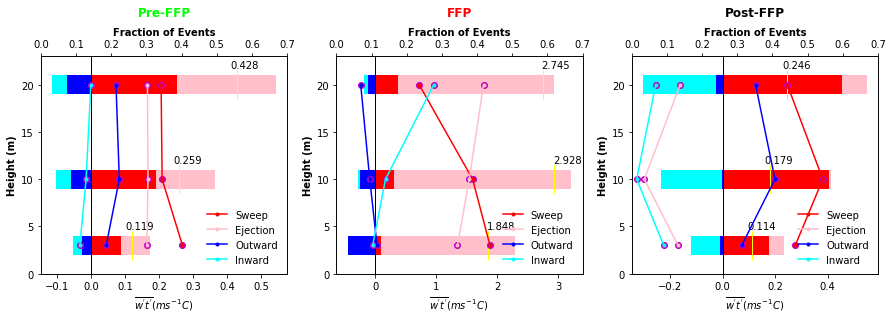

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
Y = [20, 10, 3]
for pi in range(3):
    ax = plt.subplot(1,3,pi+1)
    plt.barh(Y, EventMean[::-1, pi, 0]+EventMean[::-1, pi, 1], align='center', height=2, color='pink')
    plt.barh(Y, EventMean[::-1, pi, 0], align='center', height=2, color='red')
    plt.barh(Y, EventMean[::-1, pi, 2]+EventMean[::-1, pi, 3], align='center', height=2, color='cyan')
    plt.barh(Y, EventMean[::-1, pi, 2], align='center', height=2, color='b')
#     plt.legend(['Ejection', 'Sweep', 'Inward Interaction', 'Outward Interaction'], loc='best', frameon=False)
    plt.vlines(HeatMean[0, pi], 1.5, 4.5, lw=1, colors='yellow')
    plt.text(HeatMean[0, pi]-.018, 4.7, f'{HeatMean[0, pi]:.3f}')
    plt.vlines(HeatMean[1, pi], 8.5, 11.5, lw=1, colors='yellow')
    plt.text(HeatMean[1, pi]-.018, 11.7, f'{HeatMean[1, pi]:.3f}')
    plt.vlines(HeatMean[2, pi], 18.5, 21.5, lw=1, colors='yellow')
    plt.text(HeatMean[2, pi]-.018, 21.7, f'{HeatMean[2, pi]:.3f}')
    plt.vlines(0, 0, 23, lw=1)
# #     plt.xlim(xl, xr)
    plt.ylim(0, 23)
    plt.xlabel("$\overline{w^{'}t^{'}} (m s^{-1} C)$ ")
    plt.ylabel("Height (m)", fontweight='bold')
    
    if pi == 0:
        plt.text(.5, 1.2, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    elif pi == 1:
        plt.text(.5, 1.2, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    elif pi == 2:
        plt.text(.5, 1.2, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    
    axx = ax.twiny()
    axx.plot(Frac[:, pi, 0], Y, 'r-o', ms=3)
    axx.scatter(Frac[:, pi, 0], Y, color='m')
    axx.plot(Frac[:, pi, 1], Y, c='pink', ls='-', marker='o', ms=3)
    axx.scatter(Frac[:, pi, 1], Y, color='m')
    axx.plot(Frac[:, pi, 3], Y, 'b-o', ms=3)
    axx.scatter(Frac[:, pi, 3], Y, color='m')
    axx.plot(Frac[:, pi, 2], Y, c='cyan', ls='-', marker='o', ms=3)
    axx.scatter(Frac[:, pi, 2], Y, color='m')
    axx.set_xlim(0, .7)
    axx.set_xlabel('Fraction of Events', fontweight='bold')
    plt.legend(['Sweep', 'Ejection', 'Outward', 'Inward'], loc='lower right', frameon=False)
plt.savefig('./plot/ContributionFreq_AverTower.png', bbox_inches='tight')